<a href="https://colab.research.google.com/github/aprajeeta-99/python_projects/blob/main/Calculate_Value_at_Risk_(VaR)_Using_the_Monte_Carlo_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SOURCE CODE GUIDANCE/REFERENCE: https://www.youtube.com/watch?v=X8aNFXJEENs&t=323s

##Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

##Setting Time Range and Ticker List


In this section, we set the time range for our historical data to 15 years and create a list of stock tickers for our portfolio.



In [ ]:
### Set time from to a certain number of years
years = 15

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 365*years)

### Create a list of tickers
tickers = ['SPY','BND','GLD','QQQ','VTI']

##Downloading Adjusted Close Prices

Next, we download the daily adjusted close prices for each stock ticker using the yfinance library and store the data in a DataFrame.

In [ ]:
### Download the daily adjusted close prices for the tickers
adj_close_df = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start = startDate, end = endDate)
    adj_close_df[ticker] = data['Adj Close']

print(adj_close_df)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                   SPY        BND         GLD         QQQ         VTI
Date                                                                 
2009-08-05   75.937782  50.723091   94.779999   34.715935   38.567787
2009-08-06   75.544487  50.755756   94.599998   34.410114   38.301849
2009-08-07   76.535217  50.403145   93.750000   34.847012   38.841324
2009-08-10   76.376427  50.814510   92.930000   34.602348   38.750149
2009-08-11   75.423492  50.912464   92.790001   34.305260   38.248661
...                ...        ...         ...         ...         ...
2024-07-25  538.409973  72.650002  218.330002  458.269989  266.500000
2024-07-26  544.440002  72.940002  220.630005  462.970001  269.690002
2024-07-29  544.760010  73.029999  220.320007  463.899994  269.709991
2024-07-30  542.000000  73.120003  222.520004  457.529999  268.589996
2024-07-31  550.809998  73.519997  226.550003  471.070007  272.570007

[3772 rows x 5 columns]


##Calculating Daily Log Returns


We calculate the daily log returns for each stock in our portfolio and drop any missing values.



In [ ]:
### Calculate the daily log returns and drop any NAs
log_returns = np.log(adj_close_df/adj_close_df.shift(1))
log_returns  = log_returns.dropna()

print(log_returns)

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2009-08-06 -0.005193  0.000644 -0.001901 -0.008848 -0.006919
2009-08-07  0.013029 -0.006971 -0.009026  0.012617  0.013987
2009-08-10 -0.002077  0.008128 -0.008785 -0.007046 -0.002350
2009-08-11 -0.012555  0.001926 -0.001508 -0.008623 -0.013026
2009-08-12  0.010672 -0.000641  0.001723  0.015418  0.010867
...              ...       ...       ...       ...       ...
2024-07-25 -0.005224  0.002205 -0.015768 -0.011089 -0.003857
2024-07-26  0.011137  0.003984  0.010479  0.010204  0.011899
2024-07-29  0.000588  0.001233 -0.001406  0.002007  0.000074
2024-07-30 -0.005079  0.001232  0.009936 -0.013827 -0.004161
2024-07-31  0.016124  0.005455  0.017949  0.029164  0.014709

[3771 rows x 5 columns]


##Defining Functions to Calculate Portfolio Expected Return and Standard Deviation


We define two functions, expected_return() and standard_deviation(), which will be used to calculate the expected return and standard deviation of our portfolio, respectively.

In [ ]:
### Create a function that will be used to calculate portfolio expected return
###We are assuming that future returns are based on past returns, which is not a reliable assumption.
def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)

### Create a function that will be used to calculate portfolio standard deviation
def standard_deviation (weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

##Creating a Covariance Matrix


We create a covariance matrix for all the securities in our portfolio using the daily log returns.



In [ ]:
### Create a covariance matrix for all the securities
cov_matrix = log_returns.cov()
print(cov_matrix)

              SPY           BND       GLD           QQQ           VTI
SPY  1.166787e-04 -3.448187e-08  0.000007  1.288704e-04  1.191255e-04
BND -3.448187e-08  9.191534e-06  0.000009  8.424353e-07  1.498182e-07
GLD  6.534988e-06  8.797040e-06  0.000097  7.508847e-06  7.141799e-06
QQQ  1.288704e-04  8.424353e-07  0.000008  1.652497e-04  1.316448e-04
VTI  1.191255e-04  1.498182e-07  0.000007  1.316448e-04  1.226092e-04


##Calculating Portfolio Expected Return and Standard Deviation


We create an equally weighted portfolio and calculate the portfolio’s expected return and standard deviation using the functions we defined earlier.



In [ ]:
### Create an equally weighted portfolio and find total portfolio expected return and standard deviation
portfolio_value = 1000000
weights = np.array([1/len(tickers)]*len(tickers))
portfolio_expected_return = expected_return(weights, log_returns)
portfolio_std_dev = standard_deviation (weights, cov_matrix)

##Defining Functions for Monte Carlo Simulation


We define two functions: random_z_score() and scenario_gain_loss(). The first function generates a random Z-score based on a normal distribution, and the second function calculates the gain or loss for a given scenario.

In [ ]:
def random_z_score():
    return np.random.normal(0, 1)

### Create a function to calculate scenarioGainLoss
days = 20

def scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days):
    return portfolio_value * portfolio_expected_return * days + portfolio_value * portfolio_std_dev * z_score * np.sqrt(days)

##Running Monte Carlo Simulation


We run 10,000 Monte Carlo simulations, calculating the scenario gain/loss for each simulation and storing the results in a list.

In [ ]:
### Run 10000 simulations
simulations = 10000
scenarioReturn = []

for i in range(simulations):
    z_score = random_z_score()
    scenarioReturn.append(scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days))

##Calculating Value at Risk (VaR)


We specify a confidence interval of 99% and calculate Value at Risk (VaR) using the results of our simulations.

In [ ]:
### Specify a confidence interval and calculate the Value at Risk (VaR)
confidence_interval = 0.99
VaR = -np.percentile(scenarioReturn, 100 * (1 - confidence_interval))
print(VaR)

67211.91254450791


##Plotting the Results


Finally, we create a histogram to visualize the distribution of portfolio gain/loss over the specified number of days. We also add a vertical dashed line to indicate the VaR at our chosen confidence level.

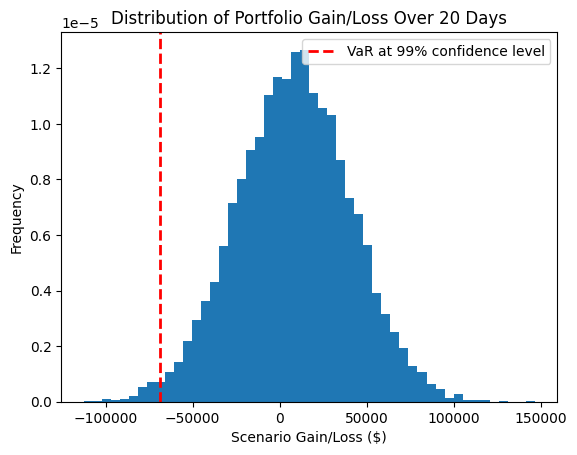

In [ ]:
### Plot the results of all 10000 scenarios
plt.hist(scenarioReturn, bins=50, density=True)
plt.xlabel('Scenario Gain/Loss ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio Gain/Loss Over {days} Days')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()